# Linear Regression Example

Predict the grade, G3, using linear regression

## 1. Import Data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

from math import sqrt

In [44]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
sns.set(rc={'figure.figsize':(12,10)})

In [45]:
raw_data = pd.read_csv('student-mat.csv', sep=';')
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2. Data Cleaning

In [46]:
raw_data.shape

(395, 33)

In [47]:
raw_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [48]:
raw_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [49]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_vals = len(unique_vals)
    if nr_vals < 50:
        print(f'The number of values in features "{column}" are {nr_vals}; {unique_vals}')
    else:
        print(f'The number of values in features "{column}" are {nr_vals}')

The number of values in features "school" are 2; ['GP' 'MS']
The number of values in features "sex" are 2; ['F' 'M']
The number of values in features "age" are 8; [15 16 17 18 19 20 21 22]
The number of values in features "address" are 2; ['R' 'U']
The number of values in features "famsize" are 2; ['GT3' 'LE3']
The number of values in features "Pstatus" are 2; ['A' 'T']
The number of values in features "Medu" are 5; [0 1 2 3 4]
The number of values in features "Fedu" are 5; [0 1 2 3 4]
The number of values in features "Mjob" are 5; ['at_home' 'health' 'other' 'services' 'teacher']
The number of values in features "Fjob" are 5; ['at_home' 'health' 'other' 'services' 'teacher']
The number of values in features "reason" are 4; ['course' 'home' 'other' 'reputation']
The number of values in features "guardian" are 3; ['father' 'mother' 'other']
The number of values in features "traveltime" are 4; [1 2 3 4]
The number of values in features "studytime" are 4; [1 2 3 4]
The number of values in

In [50]:
# change datatypes to correct ones
raw_data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]  = raw_data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']].astype(int)

In [51]:
raw_data.dtypes

school        object
sex           object
age            int32
address       object
famsize       object
Pstatus       object
Medu           int32
Fedu           int32
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int32
studytime      int32
failures       int32
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int32
freetime       int32
goout          int32
Dalc           int32
Walc           int32
health         int32
absences       int32
G1             int32
G2             int32
G3             int32
dtype: object

## 2. Data Exploration

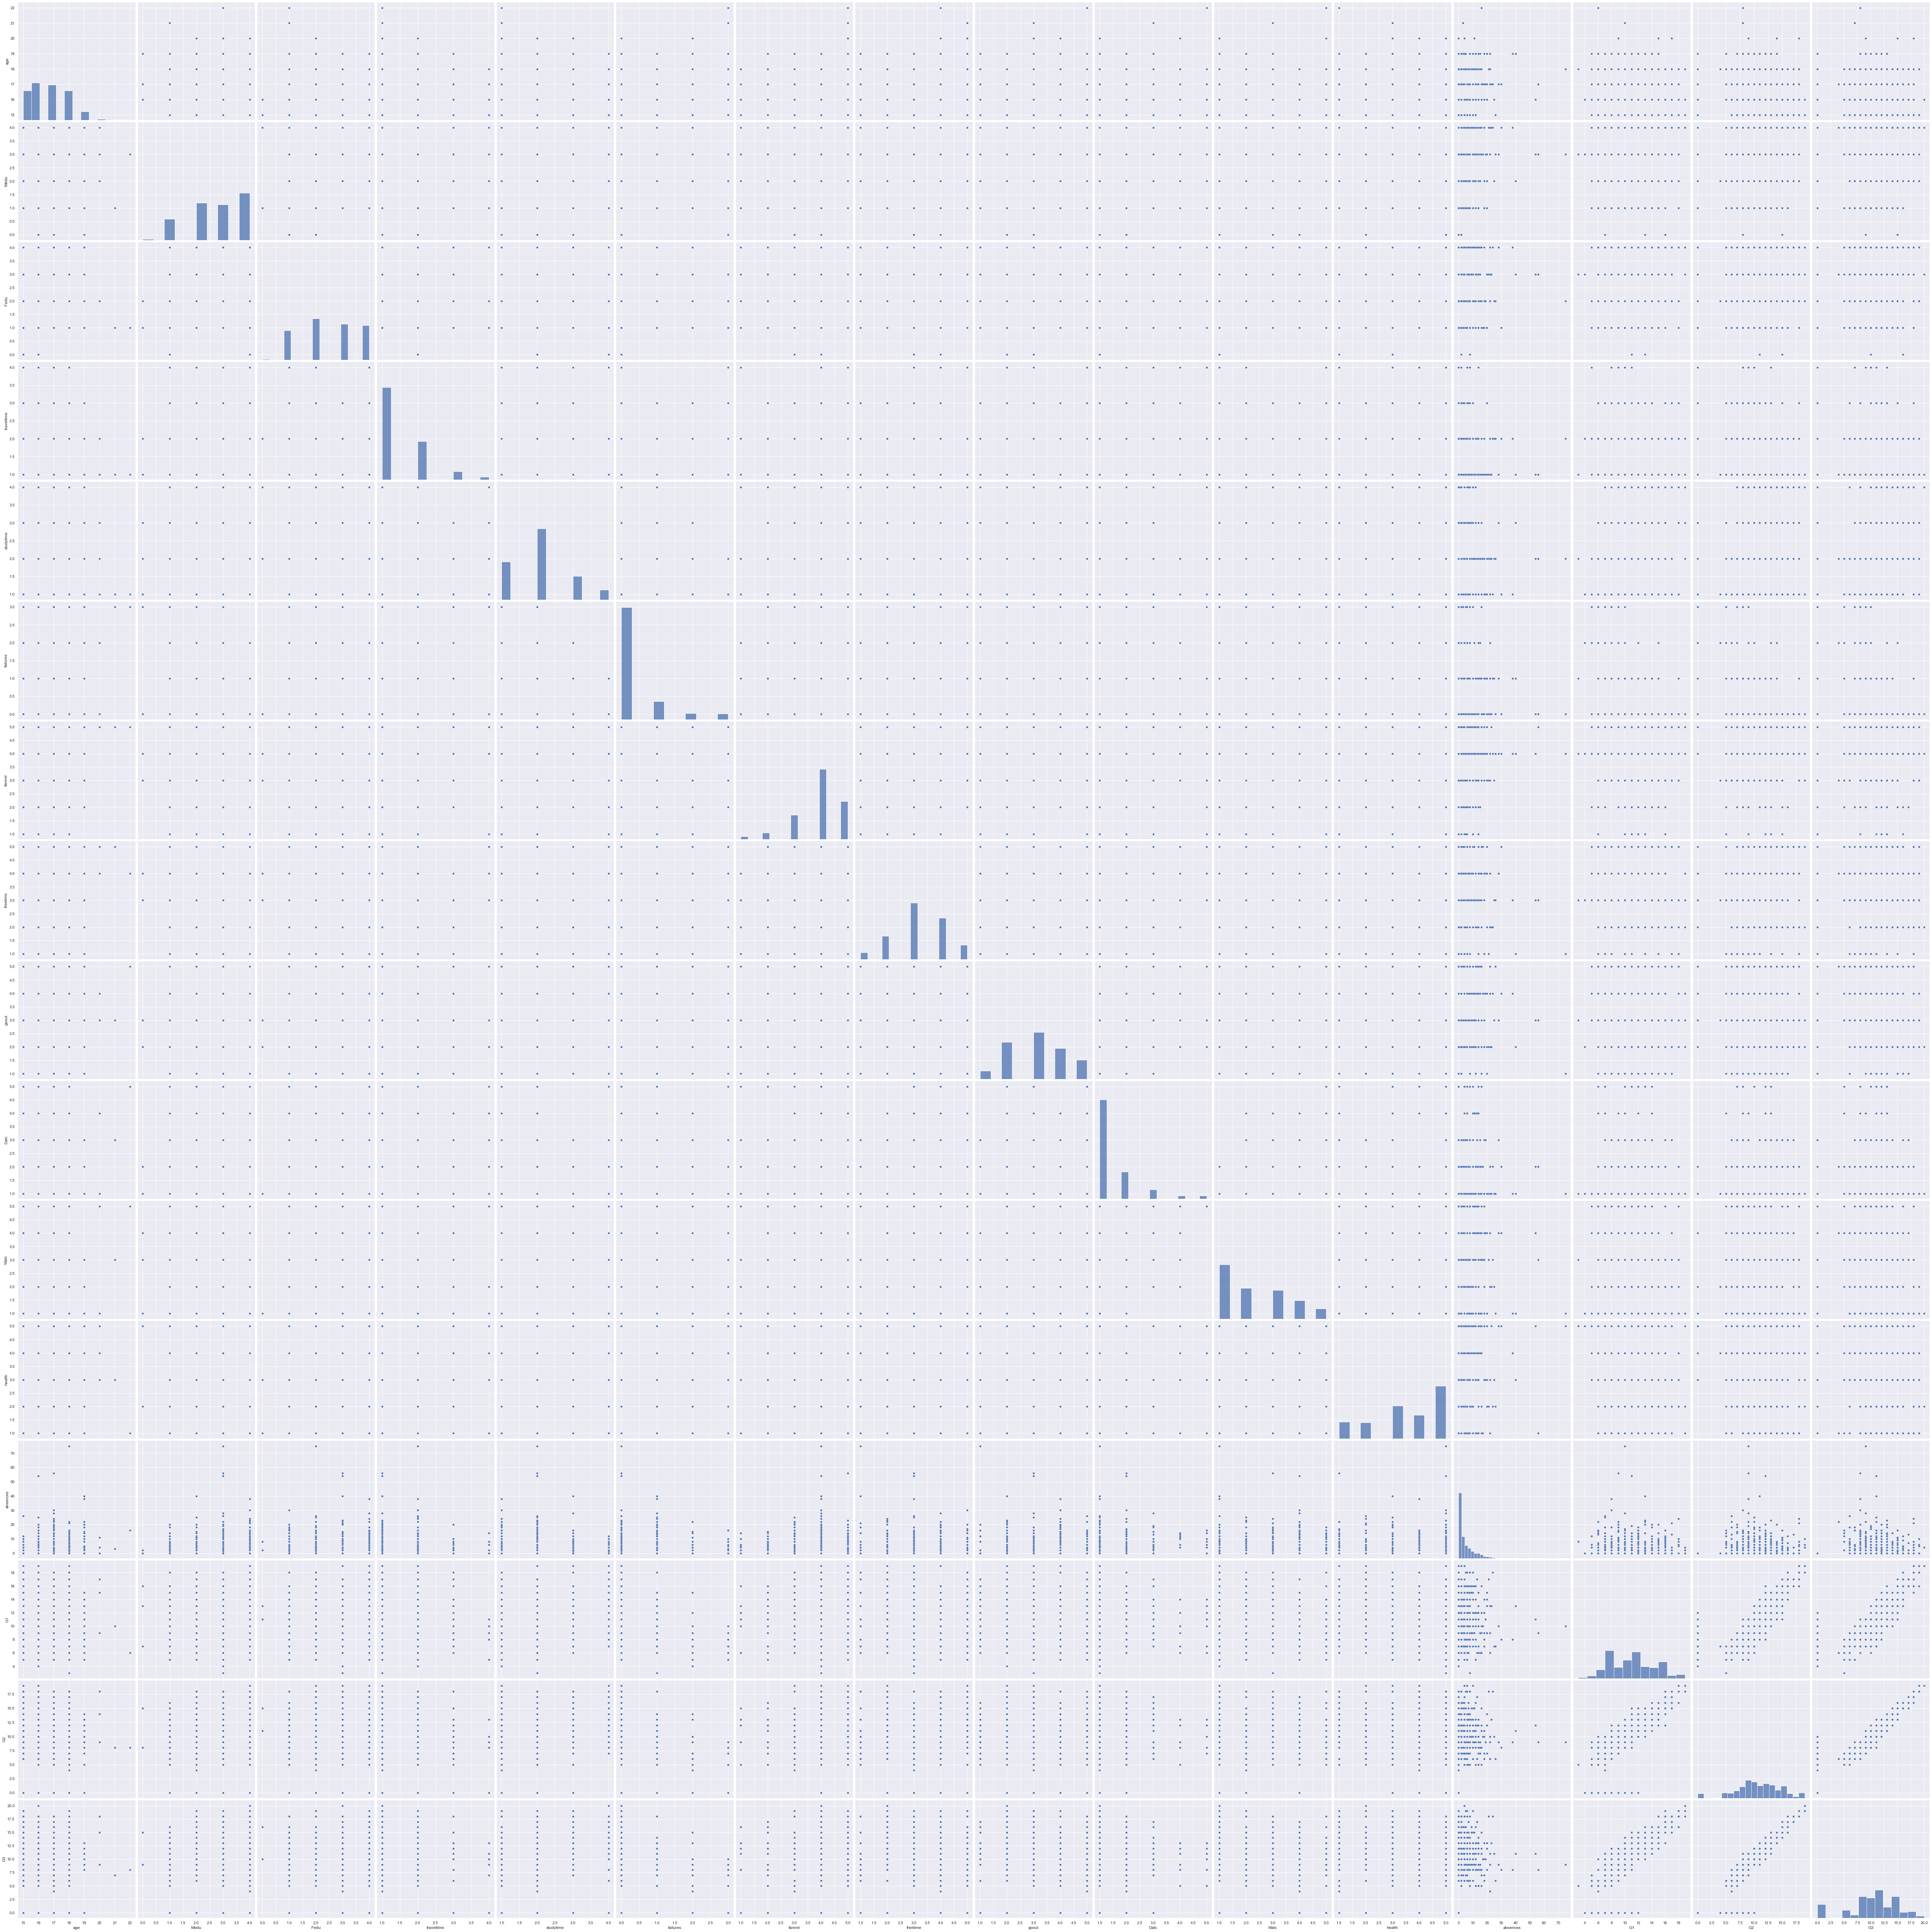

In [76]:
visual = sns.pairplot(raw_data, height=5)

In [59]:
# running correlation between numerical continuous columns
correlation = raw_data.corr()

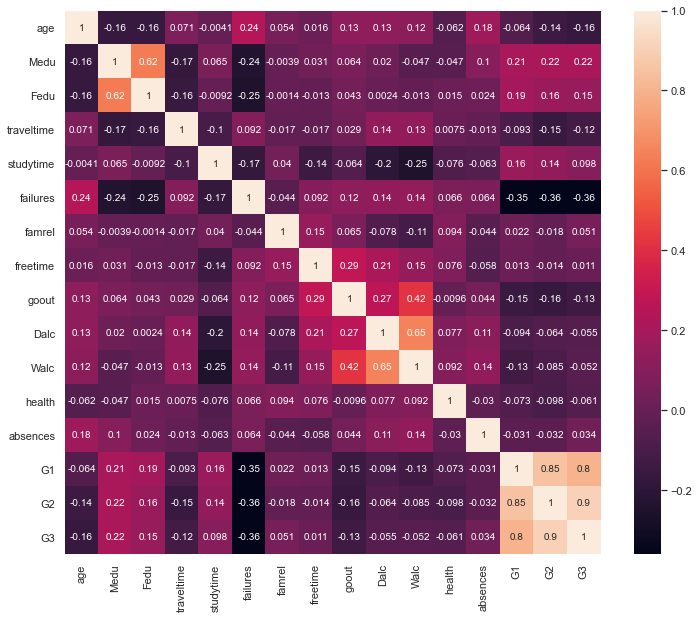

In [60]:
# heat map to visualise correlation
heatmap = sns.heatmap(correlation, annot=True, annot_kws={'size':10})

Strong relationship between G1, G2 and G3. Failures seem to have a moderate relationship with G3.

## 3. Feature Selection

In [87]:
raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [88]:
raw_data.dtypes

school        object
sex           object
age            int32
address       object
famsize       object
Pstatus       object
Medu           int32
Fedu           int32
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int32
studytime      int32
failures       int32
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int32
freetime       int32
goout          int32
Dalc           int32
Walc           int32
health         int32
absences       int32
G1             int32
G2             int32
G3             int32
dtype: object

In [89]:
raw_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [90]:
features = ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

In [91]:
# turn categorical data into numerical
new_raw_data = pd.get_dummies(raw_data, columns=features)
new_raw_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [92]:
new_raw_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [93]:
X = new_raw_data.drop('G3', axis=1) # features
y = new_raw_data['G3'] # label
print(X.shape)
print(y.shape)

(395, 58)
(395,)


In [94]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [95]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int32

In [96]:
X = X.values

In [97]:
# run a decision tree
dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [98]:
# running feature imprtance
for index, column in enumerate(new_raw_data.drop('G3', axis=1)):
    print(f'The feature importance for {column} is {round(dt.feature_importances_[index], 3)}')

The feature importance for age is 0.008
The feature importance for Medu is 0.006
The feature importance for Fedu is 0.022
The feature importance for traveltime is 0.015
The feature importance for studytime is 0.012
The feature importance for failures is 0.01
The feature importance for famrel is 0.023
The feature importance for freetime is 0.021
The feature importance for goout is 0.009
The feature importance for Dalc is 0.008
The feature importance for Walc is 0.032
The feature importance for health is 0.027
The feature importance for absences is 0.058
The feature importance for G1 is 0.044
The feature importance for G2 is 0.515
The feature importance for school_GP is 0.004
The feature importance for school_MS is 0.003
The feature importance for sex_F is 0.0
The feature importance for sex_M is 0.001
The feature importance for address_R is 0.01
The feature importance for address_U is 0.0
The feature importance for famsize_GT3 is 0.007
The feature importance for famsize_LE3 is 0.011
The 

In [102]:
# running feature imprtance
fi_col = []
fi = []

for index, column in enumerate(new_raw_data.drop('G3', axis=1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[index])
    
# put the feature and feature importance into a dataframe 
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns=['Feature', 'Feature Importance'])
fi_df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
14,G2,0.515363
12,absences,0.058310
13,G1,0.043853
10,Walc,0.032378
11,health,0.026888
6,famrel,0.022881
2,Fedu,0.021664
7,freetime,0.021002
32,Fjob_other,0.016453
3,traveltime,0.014982


In [106]:
fi_df = fi_df[fi_df['Feature Importance'] > 0]

In [107]:
columns_to_keep = fi_df['Feature']

## 4. Splitting raw data

In [108]:
print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

(395, 59)
(395, 47)


In [109]:
X = new_raw_data[columns_to_keep].values
y = new_raw_data['G3'].astype(int)

In [110]:
print(X.shape, y.shape)

(395, 47) (395,)


In [111]:
# hold out training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=15)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(316, 47) (79, 47) (316,) (79,)


## 5. Linear Regression

In [112]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

## 6. Evaluating the Model

In [122]:
# accuracy of training dataset
print(f'The accuracy of the training dataset is : {lm.score(X_train, y_train)}')

# predicted values for the X training
y_pred = lm.predict(X_train)

# r2 score for accuracy
print(f'The accuracy (r2) of the training dataset is : {r2_score(y_train, y_pred)}')

# check accuracy on unseen data
print(f'The accuracy of the testing dataset is : {lm.score(X_test, y_test)}')




The accuracy of the training dataset is : 0.8509054823217416
The accuracy (r2) of the training dataset is : 0.8509054823217416
The accuracy of the testing dataset is : 0.7993332777859392


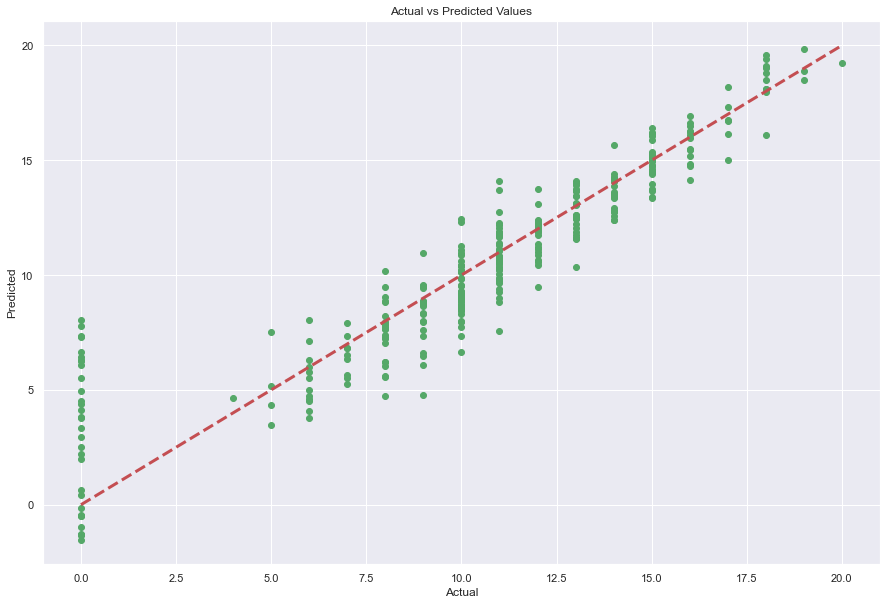

In [123]:
# plot a graph of actual vs predicted values
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, c='g')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='r', lw=3) # shows correct prediction i.e. when actual = precicted
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

C:\Users\Abdulkadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


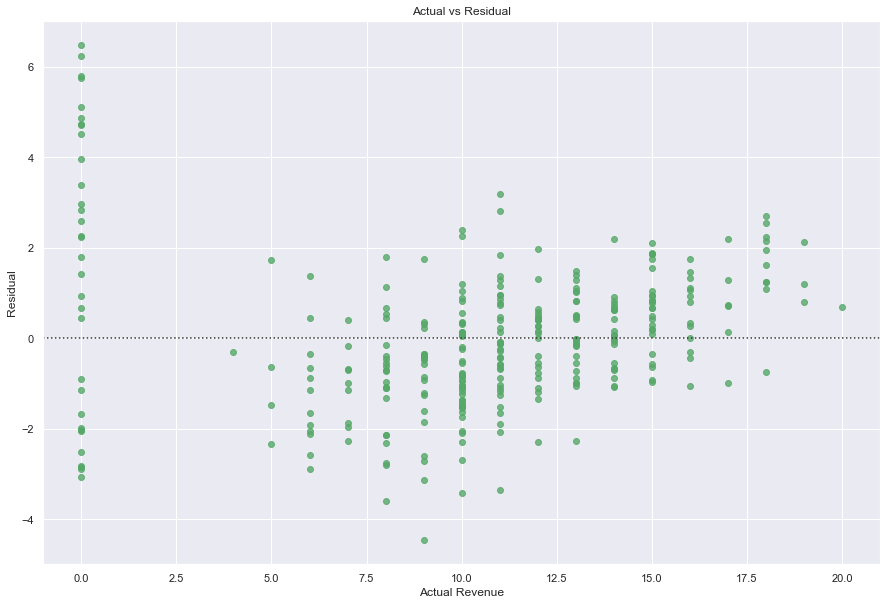

In [124]:
# plot a graph of actual vs predicted values
plt.figure(figsize=(15,10))
sns.residplot(y_train, y_pred, color='g')
plt.xlabel('Actual Revenue')
plt.ylabel('Residual')
plt.title('Actual vs Residual')
plt.show()

In [128]:
coeff = lm.coef_
coeff

array([-0.128704, 0.005703, -0.007641, 0.272019, -0.114127, -0.286710,
       0.280860, 0.070511, 0.077025, -0.087390, 0.102373, 0.058796,
       0.042069, 0.189761, 0.964698, -0.148478, 0.148478, 0.099842,
       -0.204214, 0.007481, -0.007481, -0.307183, -0.152381, 0.129882,
       -0.044807, 0.097944, -0.030637, -0.159779, -0.312988, -0.127955,
       -0.024268, -0.154543, 0.102716, 0.076096, 0.270422, 0.555590,
       -0.479415, -0.076901, 0.076901, 0.129346, 0.097068, -0.097068,
       -0.338707, -0.022554, -0.168832, 0.166683, -0.166683])

In [129]:
intercept = lm.intercept_
intercept

-0.9814960865344027

In [133]:
predictions = lm.predict(X_test)
predictions

array([17.769799, 12.126264, 12.447037, 9.291798, 12.738544, 11.682205,
       9.788424, 8.234856, 7.392445, 11.199672, 14.067966, 11.713387,
       13.973357, 16.238975, 6.940491, 10.742475, -2.280949, 12.235001,
       9.203467, 15.545093, 15.859478, 14.710535, 10.433957, 8.203987,
       8.232239, 9.069083, 4.080555, 19.048843, 14.401502, 7.036874,
       15.502350, 7.598297, 6.032501, 6.709694, 5.977028, 7.897717,
       8.537348, 12.478000, 3.819484, 12.794999, 7.166814, 11.065532,
       6.973050, 9.492336, 8.920469, 14.413794, 9.990325, 8.602956,
       9.884229, 8.175768, 10.323502, 14.034615, 11.611129, 18.674823,
       20.510762, 9.435229, 7.313705, 4.278301, 9.960951, 15.484573,
       14.548034, 11.398265, 15.830240, 9.216157, 13.580272, 7.701917,
       7.353468, 11.505482, 12.031062, 8.053084, 2.603338, 6.136781,
       13.315622, 10.930035, 9.006856, -0.305673, 7.757883, 11.398489,
       16.316541])

In [141]:
for x in range(len(predictions)):
    print(predictions[x], X_test[x], y_test.values[x])

17.769799232625346 [17  3  2  1  4  0  5  2  2  1  2  5  0 17 17  1  0  0  0  1  0  1  0  1
  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  1  0  1  0  0  1  1  0] 18
12.12626384935536 [16  3  1  1  1  0  5  3  2  2  2  5  2 12 12  1  0  1  0  1  0  1  0  0
  1  0  0  1  0  0  0  0  0  1  1  0  1  1  0  0  0  1  1  0  0  1  0] 14
12.447036596405676 [17  4  4  1  2  0  5  3  5  4  5  3 13 12 12  1  0  1  0  0  1  1  0  0
  0  1  0  1  0  0  0  1  0  0  1  0  1  0  1  1  1  0  1  0  1  0  1] 13
9.291798209889176 [15  4  3  1  2  0  4  4  4  2  4  2  0 10 10  1  0  0  0  0  1  1  0  0
  0  1  0  0  1  0  0  0  0  1  0  0  0  1  0  0  0  1  1  0  1  0  1] 10
12.738544061407755 [17  2  2  2  2  0  4  4  4  2  3  5  6 12 12  1  0  0  0  0  1  1  0  0
  0  1  0  1  0  0  1  0  0  0  1  0  0  0  1  1  1  0  1  0  1  0  1] 12
11.682205094121521 [18  3  2  1  3  0  5  3  2  1  1  3  1 13 12  1  0  1  1  1  0  1  0  0
  1  0  0  1  0  0  1  0  0  0  1  0  1  1  0  0  0  1  0  0  0  1  0] 12
9.7884

In [144]:
new_raw_data[columns_to_keep].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famsup_no,famsup_yes,paid_yes,activities_no,activities_yes,nursery_yes,higher_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,1,0,1,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,1,1,1,0,1,0,0,1,0
